In [552]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as pt

In [553]:
Initial_Data = pd.read_csv('/Users/jimmy/Desktop/employee_retention_data.csv')
print(len(Initial_Data))
print(len(Initial_Data.company_id.unique()))
Initial_Data.head()

24702
12


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [554]:
# Modify original data
Mod = Initial_Data.copy(deep = False)
join = []
quit = []
for n in range(len(Initial_Data)):
    join.append(dt.datetime.strptime(Mod.join_date[n],'%Y-%m-%d').date())
    
    if pd.isnull(Mod.quit_date[n]) == False:  
        quit.append(dt.datetime.strptime(Mod.quit_date[n],'%Y-%m-%d').date())
    else:
        quit.append(np.nan)
    
del Mod['join_date']
del Mod['quit_date']

join = pd.Series(join)
quit = pd.Series(quit)

Mod['Join'] = join
Mod['Quit'] = quit

total_time = (Mod.Quit - Mod.Join).dt.days
total_time = pd.Series(total_time)
Mod['Total Time'] = total_time
Mod.head()

,employee_id,company_id,dept,seniority,salary,Join,Quit,Total Time
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


In [555]:
# Find Employment by days for each company
company = {}
join_ds = {}
quit_ds = {}
Total_date_set = {}
Employee_sum = {}
employee_total = {}

# Separate Companies
for c_num in range(len(Mod.company_id.unique())):
    company[c_num] = pd.DataFrame(Mod.loc[Mod['company_id'] == c_num+1])
    join_ds[c_num] = pd.DataFrame(company[c_num].Join)
    quit_ds[c_num] = pd.DataFrame(company[c_num].Quit)

# Calculate employment by day
for c_num in range(len(Mod.company_id.unique())):
    join_temp = join_ds[c_num]
    quit_temp = quit_ds[c_num]
    jdate_temp = pd.DataFrame(join_temp.Join)
    ldate_temp = pd.DataFrame(quit_temp.Quit).dropna(thresh=1)
    
    del join_temp['Join']
    del quit_temp['Quit']
    
    join_temp['Value'] = 1
    quit_temp['Value'] = -1
    
    join_temp['Date'] = jdate_temp
    quit_temp['Date'] = ldate_temp
    
    Total_date_set[c_num] = pd.concat([join_temp, quit_temp]).sort_values(by='Date')
    temp_employee_value = []
    employee = []
  
final_counts = {}
# Find Employee count list
for c_num in range(len(Mod.company_id.unique())):
    dates = pd.DataFrame(Total_date_set[c_num])
    valuef = []
    for t in range(len(dates)):
        value = value + dates.Value.iloc[t]
        valuef.append(value)
    final_counts[c_num] = pd.Series(valuef)

final_counts = pd.DataFrame(final_counts).dropna(thresh=1)

final_list = {}
# Add Date to each companies info
for c_num in range(len(Mod.company_id.unique())):
    date_set = Total_date_set[c_num].copy(deep = False)
    date_set.reset_index(inplace = True)
    del date_set['Value']
    del date_set['index']
    temp = pd.DataFrame(final_counts[c_num]).dropna(thresh=0) 
    date_set['Employee Count'] = temp-1
    date_set['Company'] = c_num+1
    final_list[c_num] = date_set

# Company data is stored in a variable called "final list". Each company is stored separately in an index
final_list[0].head()

# Create combined variable
Combined_Single = pd.concat(([final_list[0], final_list[1], final_list[2], final_list[3], final_list[4], final_list[5],
                             final_list[6], final_list[7], final_list[8], final_list[9], final_list[10], final_list[11]]))

Combined_Single.dropna()
Combined_Single['Start Date'] = dt.datetime.strptime('2011-01-24','%Y-%m-%d').date()
start_time = Combined_Single.Date - Combined_Single['Start Date']
Combined_Single['Total Time'] = start_time.dt.days
Combined_Single.dropna()
Combined_Single

,Date,Employee Count,Company,Start Date,Total Time
0,2011-01-24,1.0,1,2011-01-24,0.0
1,2011-01-24,2.0,1,2011-01-24,0.0
2,2011-01-24,3.0,1,2011-01-24,0.0
3,2011-01-24,4.0,1,2011-01-24,0.0
4,2011-01-24,5.0,1,2011-01-24,0.0
5,2011-01-24,6.0,1,2011-01-24,0.0
6,2011-01-24,7.0,1,2011-01-24,0.0
7,2011-01-24,8.0,1,2011-01-24,0.0
8,2011-01-24,9.0,1,2011-01-24,0.0
9,2011-01-24,10.0,1,2011-01-24,0.0


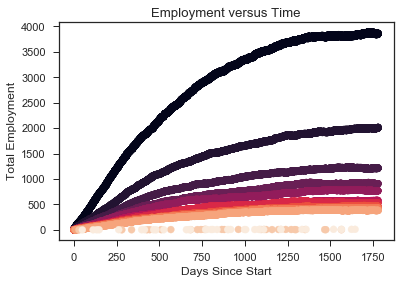

In [556]:
plt.scatter( Combined_Single['Total Time'], Combined_Single['Employee Count'], c=Combined_Single['Company'])
plt.title('Employment versus Time')
plt.xlabel('Days Since Start')
plt.ylabel('Total Employment')
plt.show()

In [557]:
Mod.head()

,employee_id,company_id,dept,seniority,salary,Join,Quit,Total Time
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


In [558]:
Analysis_Set = Mod.copy(deep = False)
No_quit = Analysis_Set[Analysis_Set['Total Time'].isnull()]
quit = Analysis_Set[Analysis_Set['Total Time'].notnull()]
print(quit.head())
print(No_quit.head())

del No_quit['employee_id']
del quit['employee_id']

   employee_id  company_id              dept  seniority    salary        Join  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   
5     509529.0           4      data_science         14  165000.0  2012-01-30   

         Quit  Total Time  
0  2015-10-30       585.0  
1  2014-04-04       340.0  
3  2013-06-07       389.0  
4  2014-08-22      1040.0  
5  2013-08-30       578.0  
    employee_id  company_id              dept  seniority    salary  \
2      927315.0           4         marketing         14  101000.0   
6       88600.0           4  customer_service         21  107000.0   
7      716309.0           2  customer_service          4   30000.0   
9      504159.0           1             sales          7  104000.

In [559]:
# Average Values for Axes
print('Those who did not quit values')
print(No_quit.mean())
print('')
print('Those who quit values')
print(quit.mean())


Those who did not quit values
company_id         3.387688
seniority         14.123392
salary        141238.473910
Total Time              NaN
dtype: float64

Those who quit values
company_id         3.459511
seniority         14.131458
salary        135652.405625
Total Time       613.486825
dtype: float64


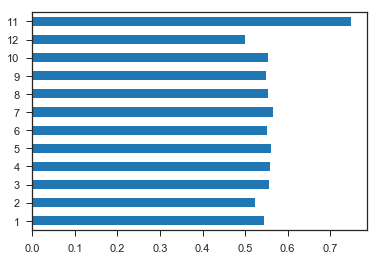

In [560]:
# Normalized Rate of Quits per Company

# Find Total # of quits for each company
total_nums = Analysis_Set.company_id.value_counts() 
quits_nums = quit.company_id.value_counts()
quit_rates_company = quits_nums/ total_nums; quit_rates.plot(kind='barh')
plt.show()

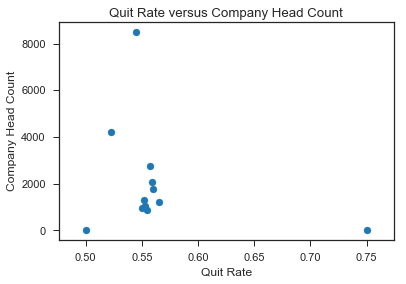

In [561]:
matplotlib.pyplot.scatter(quit_rates, total_nums)
plt.title('Quit Rate versus Company Head Count')
plt.xlabel('Quit Rate')
plt.ylabel('Company Head Count')
plt.show()
plt.show()

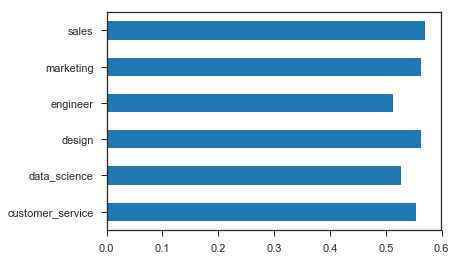

In [562]:
# Quit Rate versus Employment Type
overall_quit_dept = Mod.dept.value_counts() # Total Counts
quit_dept = quit.dept.value_counts()
quit_rates_dept = quit_dept/ overall_quit_dept; quit_rates_dept.plot(kind='barh')
plt.show()

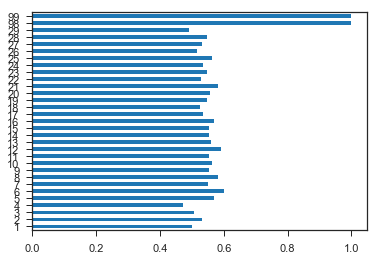

In [563]:
# Quit Rate versus Employment Type
overall_quit_seniority = Mod.seniority.value_counts() # Total Counts
quit_seniority = quit.seniority.value_counts()
quit_rates_seniority = quit_seniority/ overall_quit_seniority; quit_rates_seniority.plot(kind='barh')
plt.show()

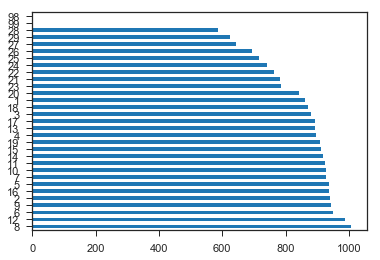

In [564]:
# Total number of people in each seniority level
overall_quit_seniority.plot(kind='barh')
plt.show()

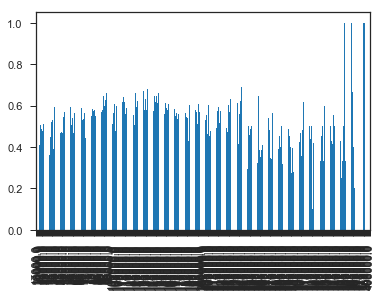

In [565]:
# Quit Rates based on salary
overall_quit_salary = Mod.salary.value_counts() # Total Counts
quit_salary = quit.salary.value_counts()
quit_rates_salary = quit_salary/ overall_quit_salary; quit_rates_salary.plot(kind='bar')
plt.show()

In [566]:
# Create Training Data Set to Predict IF employees are going to leave 
quit.head()
if_quit = quit[['company_id', 'dept', 'seniority', 'salary']] 
if_stay = No_quit[['company_id', 'dept', 'seniority', 'salary']]
if_quit['leave'] = 1
if_stay['leave'] = 0

if_quit_data = pd.concat(([if_quit, if_stay])) 
# Create Training Data Set to Predict WHEN employees are going to leave
predict_quit_data = quit[['company_id','dept','seniority','salary','Total Time']]


/Users/jimmy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jimmy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [574]:
# Create X and Y values for Each variable set
Xi = if_quit_data[['company_id','dept','seniority','salary']]
yi = if_quit_data[['leave']]

Xt = predict_quit_data[['company_id','dept','seniority','salary']]
yt = predict_quit_data[['Total Time']]

# Make Features numeric
Xi = pd.get_dummies(Xi)
Xt = pd.get_dummies(Xt)

# Feature Normalization (assume same mean and variance between test and train sets)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) # Create object
Xi = pd.DataFrame(min_max_scaler.fit_transform(Xi))
yi = pd.DataFrame(min_max_scaler.fit_transform(yi))

Xt = pd.DataFrame(min_max_scaler.fit_transform(Xt))
yt = pd.DataFrame(min_max_scaler.fit_transform(yt))

In [579]:
# Train/ Test Split
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.15, random_state=42)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.15, random_state=42)
Xi_train


,0,1,2,3,4,5,6,7,8
12644,0.727273,0.224490,0.473146,0.0,0.0,0.0,1.0,0.0,0.0
17176,0.090909,0.091837,0.322251,0.0,0.0,0.0,0.0,1.0,0.0
18215,0.363636,0.265306,0.424552,0.0,0.0,0.0,1.0,0.0,0.0
2012,0.727273,0.102041,0.117647,1.0,0.0,0.0,0.0,0.0,0.0
19341,0.818182,0.112245,0.112532,1.0,0.0,0.0,0.0,0.0,0.0
20535,0.000000,0.102041,0.130435,1.0,0.0,0.0,0.0,0.0,0.0
7898,0.000000,0.163265,0.826087,0.0,1.0,0.0,0.0,0.0,0.0
13781,0.181818,0.020408,0.081841,0.0,0.0,1.0,0.0,0.0,0.0
20915,0.090909,0.142857,0.291560,1.0,0.0,0.0,0.0,0.0,0.0
19976,0.454545,0.204082,0.631714,0.0,1.0,0.0,0.0,0.0,0.0


In [601]:
# Predict leave times via linear regression on model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.Ridge(alpha = 0.1)
regr.fit(Xt_train, yt_train)

# Predict salaries using regressor
yt_pred = regr.predict(Xt_test)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(yt_test.as_matrix(), yt_pred))
# Explained variance score: 1 is perfect prediction


Coefficients: 
 [[ 0.00444441 -0.18786834  0.15587153  0.02184212  0.00068657 -0.00575802
   0.00028314  0.0009359  -0.01798971]]
Mean squared error: 0.04
